In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [131]:
df.shape

(16744, 17)

In [132]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [134]:
df = df.drop({'Unnamed: 0','Type'},axis=1)

In [135]:
df.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Directors            726
Genres               275
Country              435
Language             614
Runtime              592
dtype: int64

In [136]:
df['Age'] = df['Age'].str.removesuffix('+')
df['Age'] = df['Age'].replace('all',None)
df['Age'] = df['Age'].fillna(2025-df['Year'])
df['Age']=df['Age'].astype(int)


In [137]:
df['Genres'] = df['Genres'].fillna(df['Genres'] == 'Unknown')
df['Country'] = df['Country'].fillna(df['Country'] =='Unknown')
df['Language'] = df['Language'].fillna(df['Language'] == 'Unknown')
df['Runtime'] = df['Runtime'].fillna(df['Runtime'].mean())
df['Directors'] = df['Directors'].fillna(df['Directors'] == 'Unknown')


In [138]:
df['IMDb'] = df['IMDb'].fillna(df['IMDb'].mean())
df['Rotten Tomatoes']=df['Rotten Tomatoes'].str.removesuffix('%')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].fillna(df['IMDb']*10)

In [139]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype(int)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              16744 non-null  int64  
 4   IMDb             16744 non-null  float64
 5   Rotten Tomatoes  16744 non-null  int64  
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Directors        16744 non-null  object 
 11  Genres           16744 non-null  object 
 12  Country          16744 non-null  object 
 13  Language         16744 non-null  object 
 14  Runtime          16744 non-null  float64
dtypes: float64(2), int64(8), object(5)
memory usage: 1.9+ MB


In [141]:

df['IMDb'] = df['IMDb'].fillna(df['IMDb'].mean()).round(2)
df['Runtime'] = df['Runtime'].round(2)

TRANSFORMATION THE DATA

In [142]:
#Arrange the records according to the released year
df=df.sort_values(by='Year')

In [143]:
#Rotton tomatoes and IMDb must be in same scale
df['Rotten Tomatoes'] = df['Rotten Tomatoes']/10

In [144]:
df['Runtime'].max()

np.float64(1256.0)

In [145]:
#Create a feature called runtime category which includes short movies, long mmovie and series based
df['runtime_category'] = pd.cut(df['Runtime'],bins = [0,45,90,1260],labels=['short_movie','series','long_movie'])

In [146]:
#Create a new df called platforms df by melt platform columns (include name of the movie)
platform_df = pd.melt(df,id_vars='Title',value_vars=['Netflix','Hulu','Prime Video','Disney+'],value_name='Platform_count',var_name='Platform')
platform_df.head()

,Title,Platform,Platform_count
0,A Trip to the Moon,Netflix,0
1,From the Manger to the Cross,Netflix,0
2,Fatty Joins the Force,Netflix,0
3,The Speed Kings,Netflix,0
4,The Birth of a Nation,Netflix,0


In [147]:
platform_df  = platform_df[platform_df['Platform_count'] != 0]

In [148]:
platform_df

,Title,Platform,Platform_count
522,The Battle of Midway,Netflix,1
523,Why We Fight: Prelude to War,Netflix,1
535,Report from the Aleutians,Netflix,1
559,Why We Fight: The Battle of Russia,Netflix,1
584,Tunisian Victory,Netflix,1
...,...,...,...
66934,Stargirl,Disney+,1
66948,Timmy Failure: Mistakes Were Made,Disney+,1
66966,Penguins: Life on the Edge,Disney+,1
66968,Diving with Dolphins,Disney+,1


ANALYSIS

In [149]:
#Get the total movies count
len(platform_df)

17381

In [150]:
#Get the movie which which are released after 2007
after_2007 = df[df['Year'] > 2007]
after_2007

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,runtime_category
9015,9016,Dog Gone,2008,7,4.7,4.7,0,0,1,0,Mark Stouffer,"Comedy,Family,Fantasy",United States,English,108.00,long_movie
56,57,The Curious Case of Benjamin Button,2008,13,7.8,7.1,1,0,0,0,David Fincher,"Drama,Fantasy,Romance",United States,"English,Russian,French",166.00,long_movie
1793,1794,Beast Stalker,2008,17,6.8,6.8,1,0,0,0,Dante Lam,"Action,Thriller",Hong Kong,Cantonese,109.00,long_movie
4211,4212,All Around Us,2008,17,7.6,7.6,0,1,0,0,Tristan David Luciotti,Documentary,United States,English,93.41,long_movie
1750,1751,1920,2008,17,6.4,6.4,1,0,1,0,Vikram Bhatt,"Horror,Mystery,Romance,Thriller",India,Hindi,138.00,long_movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,2051,Carmen Sandiego: To Steal or Not to Steal,2020,5,6.8,6.8,1,0,0,0,"Jos Humphrey,Kenny Park","Animation,Short,Action,Adventure,Family","Canada,United States",English,31.00,short_movie
5337,5338,M.O.M. Mothers of Monsters,2020,18,5.3,7.3,0,0,1,0,Tucia Lyman,Thriller,United States,English,98.00,long_movie
1613,1614,Lady Driver,2020,7,6.6,6.6,1,0,0,0,Shaun Paul Piccinino,Sport,United States,English,104.00,long_movie
2537,2538,Go! Go! Cory Carson: The Chrissy,2020,5,7.3,7.3,1,0,0,0,"Stanley Moore,Alex Woo","Animation,Short,Family",United States,English,42.00,short_movie


In [151]:
#get the counnt of ghe comedy genres only
comedy_genre = df[df['Genres'] == 'Comedy']
len(comedy_genre)

1040

In [152]:
#No of movies available in each platform
movies_in_platform  = platform_df['Platform'].value_counts()
movies_in_platform

Platform
Prime Video    12354
Netflix         3560
Hulu             903
Disney+          564
Name: count, dtype: int64

In [153]:
#Highest occurence of launguage
df['Language'].value_counts().idxmax()

'English'

In [154]:
#Movie with highest imdb rating
highest_imdb_movie = df[df['IMDb'] == df['IMDb'].max()][0:1]
highest_imdb_movie['Title']


6837    Steven Banks: Home Entertainment Center
Name: Title, dtype: object

In [155]:
#Released year wise no. of movies avg and hifgest imdb rating
df.groupby(['Year']).agg({'Title':'count','IMDb':'max'})

,Title,IMDb
Year,,
1902,1,8.2
1912,1,5.7
1913,2,5.3
1915,4,6.4
1916,1,7.8
...,...,...
2016,1206,9.1
2017,1401,9.1
2018,1285,8.8


In [156]:
#Get the top 5 directors name based on the movie count
top_5 = df.groupby('Directors').agg({'Title':'count'})[1:6]
top_5.sort_values('Title',ascending=False)


,Title
Directors,
A. Edward Sutherland,3
A'Ali de Sousa,1
A. Bhimsingh,1
"A. Edward Sutherland,John Rawlins",1
A. Fishman,1


VISUALIZATION

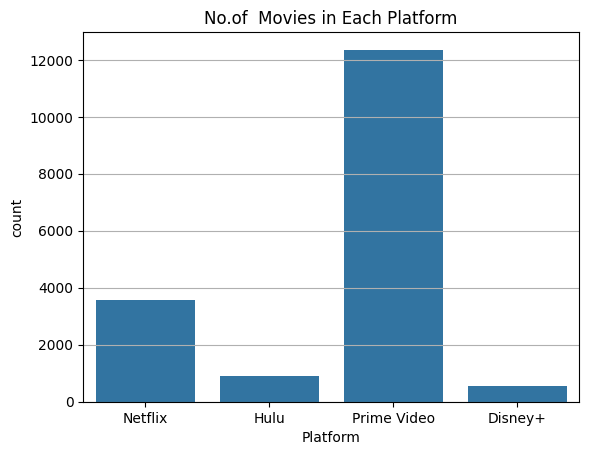

In [157]:
#plot the no of  movies in each platform
sns.countplot(platform_df,x = 'Platform')
plt.title("No.of  Movies in Each Platform")
plt.grid(True,axis='y')
plt.show()

Observation: Prime Video has the highest number of movies among all platforms, followed by Netflix. Hulu and Disney+ have relatively fewer movies, indicating a smaller content library.

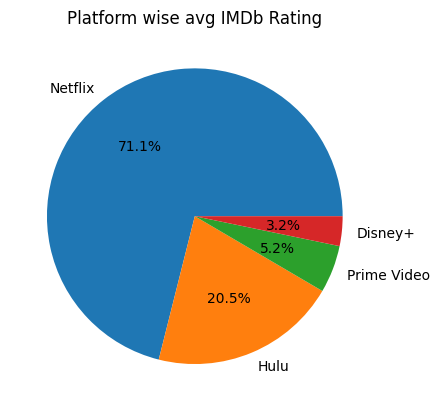

In [158]:
#Plot the platform wise avg imdb rating
plt.pie(platform_df['Platform'].value_counts().values,labels=platform_df['Platform'].unique(),autopct="%.1f%%")
plt.title("Platform wise avg IMDb Rating")
plt.show()

Observation: Netflix dominates in average IMDb ratings, contributing over 70% of the total share. Hulu follows with around 20%, while Prime Video and Disney+ have the smallest shares, indicating lower average ratings or fewer high-rated titles.

In [159]:
df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'runtime_category'],
      dtype='object')

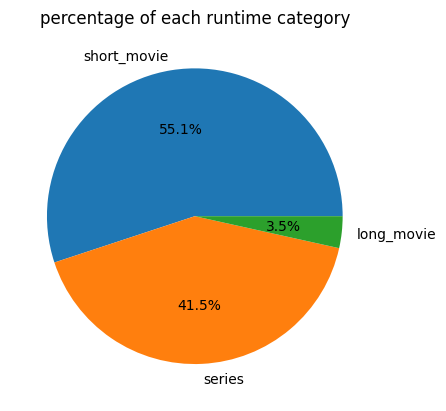

In [160]:
#plot the perc of each runtime category
plt.pie(df['runtime_category'].value_counts().values,labels = df['runtime_category'].unique(),autopct="%.1f%%")
plt.title("percentage of each runtime category")
plt.show()

Observation: Short movies dominate the dataset, making up 55.1% of the total content. Series account for 41.5%, while long movies have the least presence, contributing only 3.5% across all platforms.

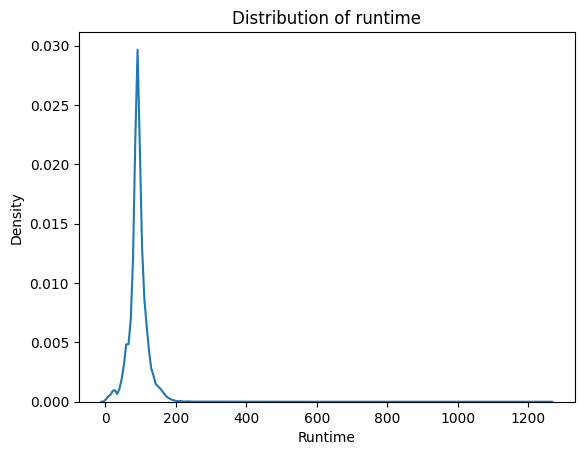

In [161]:
#Distribution of runtime
sns.kdeplot(df,x='Runtime')
plt.title("Distribution of runtime")
plt.show()

Observation: Most movies in the dataset have a runtime between 0 to 200 minutes, with a sharp peak around 90 to 120 minutes, indicating that standard-length movies are the most common.

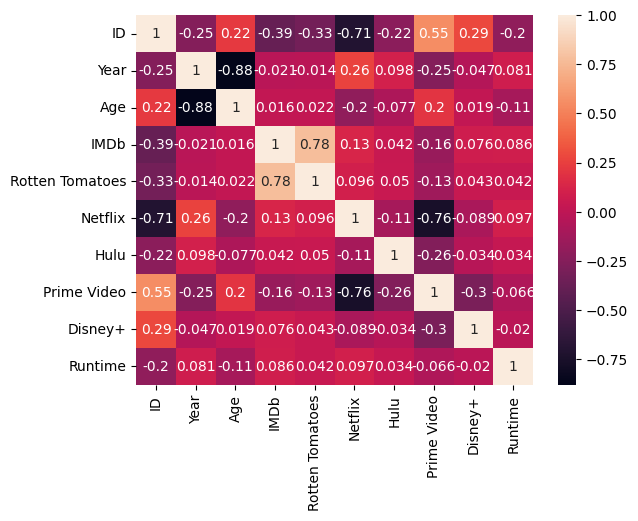

In [162]:
#Get the correlation of numerical columns using heatmap

corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.show()

1. IMDb and Rotten Tomatoes scores have a strong positive correlation (0.78), indicating that both rating systems tend to agree.

2. Age and Year have a strong negative correlation (-0.88), which is expected as older movies have lower release years.

3. Runtime has no strong correlation with any other feature, suggesting it varies independently.

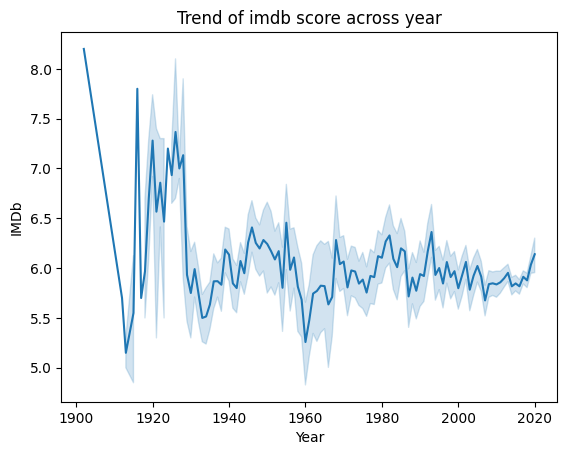

In [163]:
#Trend of imdb score across year
sns.lineplot(df,x = 'Year',y = 'IMDb')
plt.title("Trend of imdb score across year")
plt.show()

Observation: Movies released before the 1940s had higher IMDb ratings, often above 7. After that, IMDb ratings stabilized around 6, with only slight fluctuations over the years.

In [164]:
df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'runtime_category'],
      dtype='object')

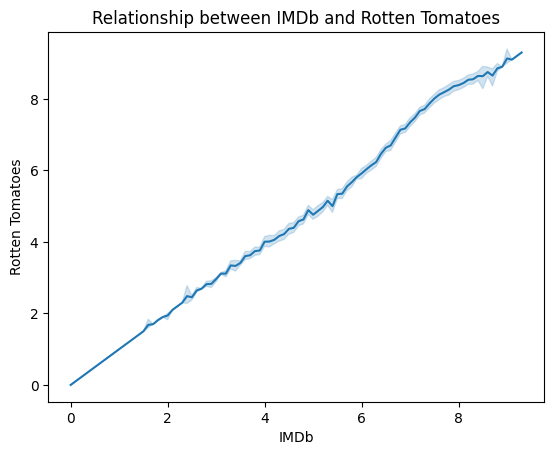

In [165]:
#Plot the relationship between imdb and rotten tomatoes
sns.lineplot(df,x= 'IMDb',y = "Rotten Tomatoes")
plt.title("Relationship between IMDb and Rotten Tomatoes")
plt.show()

Observation: Critics and IMDb ratings are equally balanced

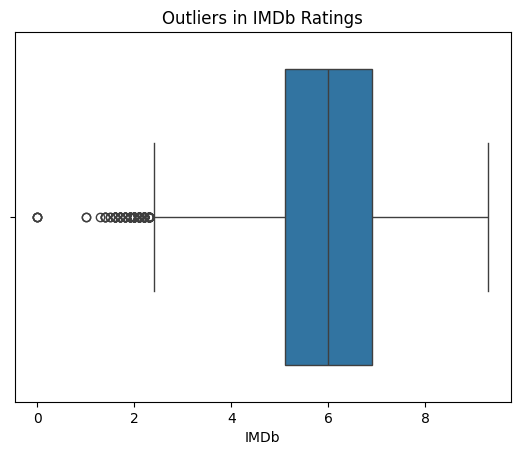

In [166]:
#Detect the outlier in imdb ratings
sns.boxplot(df,x='IMDb')
plt.title("Outliers in IMDb Ratings")
plt.show()

Observation: IMDb ratings mostly range between 5 and 8, with a few outliers below 3, indicating some poorly rated movies in the dataset.